# **IMPORTADO DE MÓDULOS**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import (Calculate_CFD, create_position, plot_gaussian, get_gaussian_params,
                       calculate_gaussian_center_sigma, calculate_slope_y_intercept)

In [3]:
# Load data 
non_normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'
normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'

non_normalized_data = np.load(os.path.join(non_normalized_dir,'pulsos_Na22_filt_norm_practica_polyfit_sin_normalizar.npz'))['data']
normalized_data = np.load(os.path.join(normalized_dir, 'Na22_test_val.npz'))['data']

# **IMPORTANT DEFINITIONS**

In [4]:
fraction = 0.2    # Fraction to attenuate pulse for CFD
shift = 7        # Delay for CFD 
threshold = 0.01  # Threshold for relative Leading Edge
t_shift = 1     
time_step = 0.2   # In ns

In [5]:
DATA_00 = normalized_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift, NOISE = False)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift, NOISE = False)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift), NOISE = False)
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift), NOISE = False)

# **CFD**

In [6]:
timestamps_dec0_DATA_00 = Calculate_CFD(DATA_00[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_dec1_DATA_00 = Calculate_CFD(DATA_00[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_dec0_DATA_02 = Calculate_CFD(DATA_02[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_dec1_DATA_02 = Calculate_CFD(DATA_02[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_dec0_DATA_20 = Calculate_CFD(DATA_20[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_dec1_DATA_20 = Calculate_CFD(DATA_20[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_dec0_DATA_04 = Calculate_CFD(DATA_04[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_dec1_DATA_04 = Calculate_CFD(DATA_04[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_dec0_DATA_40 = Calculate_CFD(DATA_40[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_dec1_DATA_40 = Calculate_CFD(DATA_40[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

V40: CENTROID(ns) = 0.3923 +/- 0.00056  FWHM(ns) = 0.2198 +/- 0.00060
V20: CENTROID(ns) = 0.1923 +/- 0.00040  FWHM(ns) = 0.2202 +/- 0.00043
V00: CENTROID(ns) = -0.0079 +/- 0.00042  FWHM(ns) = 0.2198 +/- 0.00045
V02: CENTROID(ns) = -0.2076 +/- 0.00040  FWHM(ns) = 0.2192 +/- 0.00043
V04: CENTROID(ns) = -0.4078 +/- 0.00038  FWHM(ns) = 0.2201 +/- 0.00041



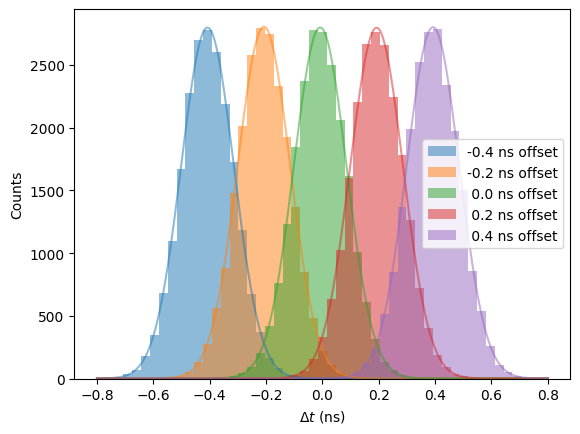

In [19]:
TOF_V00 = timestamps_dec0_DATA_00 - timestamps_dec1_DATA_00
TOF_V02 = timestamps_dec0_DATA_02 - timestamps_dec1_DATA_02
TOF_V20 = timestamps_dec0_DATA_20 - timestamps_dec1_DATA_20
TOF_V04 = timestamps_dec0_DATA_04 - timestamps_dec1_DATA_04
TOF_V40 = timestamps_dec0_DATA_40 - timestamps_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
nbins = 51
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)

params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [8]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)          

0.08443957992140355


# **RELATIVE LEADING EDGE** 

In [9]:
timestamps_dec0_DATA_00_list = []
timestamps_dec0_DATA_02_list = []
timestamps_dec0_DATA_20_list = []
timestamps_dec0_DATA_04_list = []
timestamps_dec0_DATA_40_list = []

timestamps_dec1_DATA_00_list = []
timestamps_dec1_DATA_02_list = []
timestamps_dec1_DATA_20_list = []
timestamps_dec1_DATA_04_list = []
timestamps_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = 2*threshold)
  timestamps_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = 2*threshold)
  timestamps_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = 2*threshold)
  timestamps_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = 2*threshold)
  timestamps_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = 2*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = 2*threshold)
  timestamps_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_dec0_DATA_00 = np.array(timestamps_dec0_DATA_00_list)
timestamps_dec0_DATA_02 = np.array(timestamps_dec0_DATA_02_list)
timestamps_dec0_DATA_20 = np.array(timestamps_dec0_DATA_20_list)
timestamps_dec0_DATA_04 = np.array(timestamps_dec0_DATA_04_list)
timestamps_dec0_DATA_40 = np.array(timestamps_dec0_DATA_40_list)

timestamps_dec1_DATA_00 = np.array(timestamps_dec1_DATA_00_list)
timestamps_dec1_DATA_02 = np.array(timestamps_dec1_DATA_02_list)
timestamps_dec1_DATA_20 = np.array(timestamps_dec1_DATA_20_list)
timestamps_dec1_DATA_04 = np.array(timestamps_dec1_DATA_04_list)
timestamps_dec1_DATA_40 = np.array(timestamps_dec1_DATA_40_list)

V40: CENTROID(ns) = 0.3991 +/- 0.00094  FWHM(ns) = 0.2330 +/- 0.00101
V20: CENTROID(ns) = 0.1982 +/- 0.00104  FWHM(ns) = 0.2330 +/- 0.00112
V00: CENTROID(ns) = -0.0014 +/- 0.00072  FWHM(ns) = 0.2320 +/- 0.00077
V02: CENTROID(ns) = -0.2012 +/- 0.00084  FWHM(ns) = 0.2322 +/- 0.00091
V04: CENTROID(ns) = -0.4016 +/- 0.00102  FWHM(ns) = 0.2328 +/- 0.00110



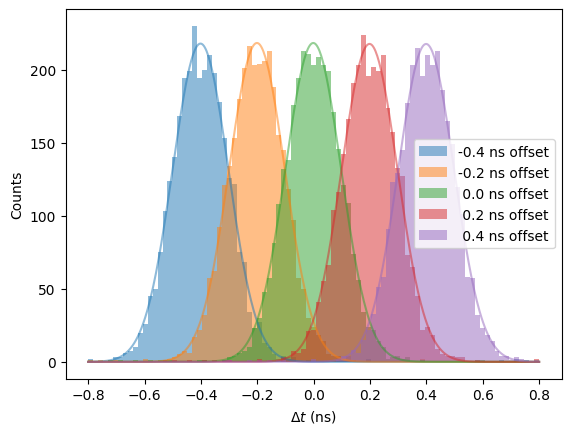

In [10]:
TOF_V00 = timestamps_dec0_DATA_00 - timestamps_dec1_DATA_00
TOF_V02 = timestamps_dec0_DATA_02 - timestamps_dec1_DATA_02
TOF_V20 = timestamps_dec0_DATA_20 - timestamps_dec1_DATA_20
TOF_V04 = timestamps_dec0_DATA_04 - timestamps_dec1_DATA_04
TOF_V40 = timestamps_dec0_DATA_40 - timestamps_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
nbins = 91
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [11]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)  

0.08810853921907619


# **D-LED**

In [12]:
DATA_00 = non_normalized_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift, NOISE = False)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift, NOISE = False)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift), NOISE = False)
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift), NOISE = False)

In [13]:
timestamps_dec0_DATA_00_list = []
timestamps_dec0_DATA_02_list = []
timestamps_dec0_DATA_20_list = []
timestamps_dec0_DATA_04_list = []
timestamps_dec0_DATA_40_list = []

timestamps_dec1_DATA_00_list = []
timestamps_dec1_DATA_02_list = []
timestamps_dec1_DATA_20_list = []
timestamps_dec1_DATA_04_list = []
timestamps_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = threshold)
  timestamps_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = threshold)
  timestamps_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = threshold)
  timestamps_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = threshold)
  timestamps_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = threshold)
  timestamps_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_dec0_DATA_00 = np.array(timestamps_dec0_DATA_00_list)
timestamps_dec0_DATA_02 = np.array(timestamps_dec0_DATA_02_list)
timestamps_dec0_DATA_20 = np.array(timestamps_dec0_DATA_20_list)
timestamps_dec0_DATA_04 = np.array(timestamps_dec0_DATA_04_list)
timestamps_dec0_DATA_40 = np.array(timestamps_dec0_DATA_40_list)

timestamps_dec1_DATA_00 = np.array(timestamps_dec1_DATA_00_list)
timestamps_dec1_DATA_02 = np.array(timestamps_dec1_DATA_02_list)
timestamps_dec1_DATA_20 = np.array(timestamps_dec1_DATA_20_list)
timestamps_dec1_DATA_04 = np.array(timestamps_dec1_DATA_04_list)
timestamps_dec1_DATA_40 = np.array(timestamps_dec1_DATA_40_list)

V40: CENTROID(ns) = 0.4016 +/- 0.00045  FWHM(ns) = 0.2192 +/- 0.00048
V20: CENTROID(ns) = 0.2016 +/- 0.00042  FWHM(ns) = 0.2195 +/- 0.00045
V00: CENTROID(ns) = 0.0016 +/- 0.00034  FWHM(ns) = 0.2195 +/- 0.00036
V02: CENTROID(ns) = -0.1986 +/- 0.00041  FWHM(ns) = 0.2195 +/- 0.00044
V04: CENTROID(ns) = -0.3985 +/- 0.00047  FWHM(ns) = 0.2194 +/- 0.00050



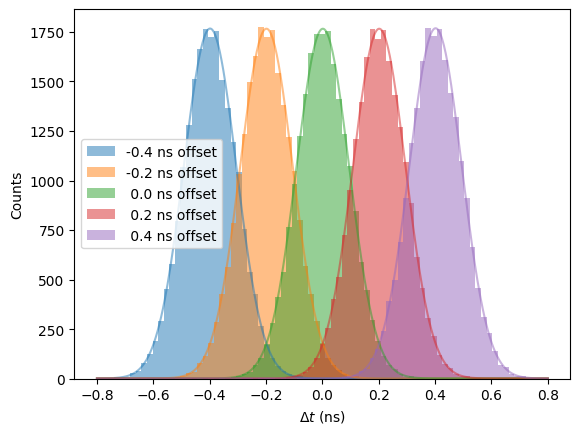

In [14]:
TOF_V00 = timestamps_dec0_DATA_00 - timestamps_dec1_DATA_00
TOF_V02 = timestamps_dec0_DATA_02 - timestamps_dec1_DATA_02
TOF_V20 = timestamps_dec0_DATA_20 - timestamps_dec1_DATA_20
TOF_V04 = timestamps_dec0_DATA_04 - timestamps_dec1_DATA_04
TOF_V40 = timestamps_dec0_DATA_40 - timestamps_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
nbins = 81
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [15]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)  

0.08586617715518352
